# Simulated mutations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fem
print 'number of threads: %i' % (fem.fortran_module.fortran_module.num_threads(),)

number of threads: 32


In [2]:
n, m, degs = 16, 4, [1]
par = fem.simulate.model_parameters(n, m, degs)

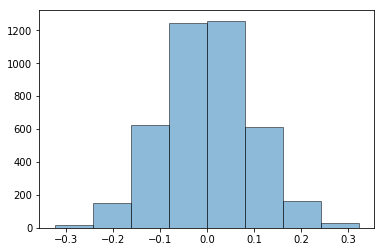

In [3]:
par_flat = np.hstack([p for p in par.itervalues()]).flatten()
tmp = plt.hist(par_flat, bins=int(np.sqrt(m*n)), ec='k', alpha=0.5)

In [4]:
x, y = fem.simulate.mutations(par, n, m, o=4.0)

In [5]:
par_fit, disc = fem.fit.fit(x, y, degs, iters=50)

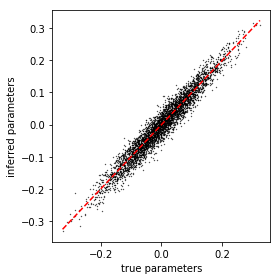

In [6]:
par_fit_flat = np.hstack([p for p in par_fit.itervalues()]).flatten()

fig = plt.figure(figsize=(4,4))
ax = plt.gca()

ax.scatter(par_flat, par_fit_flat, c='k', s=0.1)
lo, hi = par_flat.min(), par_flat.max()
grid = np.linspace(lo, hi)
ax.plot(grid, grid, 'r--')
ax.set_xlabel('true parameters')
ax.set_ylabel('inferred parameters')
    
plt.tight_layout()
plt.show()